+ This notebook is part of lecture 27 *Positive definite matrices and minima* in the OCW MIT course 18.06 by Prof Gilbert Strang [1]
+ Created by me, Dr Juan H Klopper
    + Head of Acute Care Surgery
    + Groote Schuur Hospital
    + University Cape Town
    + <a href="mailto:juan.klopper@uct.ac.za">Email me with your thoughts, comments, suggestions and corrections</a> 
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">Linear Algebra OCW MIT18.06</span> <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">IPython notebook [2] study notes by Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

+ [1] <a href="http://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/index.htm">OCW MIT 18.06</a>
+ [2] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org

In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

In [2]:
from sympy import init_printing, Matrix, symbols, Derivative, diff
from warnings import filterwarnings

In [3]:
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')

In [4]:
a, b, c, d, lamda, x1, x2, x3 = symbols('a b c d lamda x1 x2 x3')

# Tests for positive definite matrices
# Tests for minimum **x**<sup>T</sup>A**x**>0
# Ellipsoids in &#8477;<sup>n</sup>

## When is a symmetric matrix positive definite 

* Let's first consider the 2&#215;2 matrix

* Tests for complete definitiveness
    * &#955;<sub>1</sub>>0, &#955;<sub>2</sub>>0
    * *a*>0, *ac*-*b*<sup>2</sup>
    * The pivots larger than zero
    $$ {a}>0;\quad\frac{{ac}-{b}^{2}}{a}>0 $$
    * **x**<sup>T</sup>A**x**>0

* Let's look at some example matrices

In [5]:
A = Matrix([[2, 6], [6, a]])
A

⎡2  6⎤
⎢    ⎥
⎣6  a⎦

* The first question is what value of *a* would make this symmetric matrix positive definite
* The second would be, which of the tests above would you use

* The second question first
    * Seems the determinant tests would suffice
    * We need 2*a*-36>0
* The first question is the answered
    * *a* must therefor be larger than 18

* Let's play around by making *a* equal to 18

In [6]:
A = Matrix([[2, 6], [6, 18]])
A

⎡2  6 ⎤
⎢     ⎥
⎣6  18⎦

In [7]:
A.charpoly(lamda)

PurePoly(lamda**2 - 20*lamda, lamda, domain='ZZ')

In [8]:
A.eigenvals()

{0: 1, 20: 1}

* One of the eigenvalues is zero (after all, it is a singular matrix now and one eigenvalues must be zero)
* It is a 2&#215;2 matrix and we must have two eigenvalues
* The other eigenvalue must equal the trace of A, which is 20 (therefor there was no need to calculate the eigenvalues, we could just reason and read it off)
* We'll call this matrix *positive semi-definite*

* Notice that the pivot test would not have helped
$$ \frac{(6)(2)-{6}^{2}}{{2}} $$

* Let's look at **x**<sup>T</sup>A**x**>0 (where **x** is any correctly-sized vector)

In [9]:
x_vect = Matrix([x1, x2])
x_vect

⎡x₁⎤
⎢  ⎥
⎣x₂⎦

In [10]:
f = x_vect.transpose() * A * x_vect
f

[x₁⋅(2⋅x₁ + 6⋅x₂) + x₂⋅(6⋅x₁ + 18⋅x₂)]

In [11]:
f.expand() # Expanding the expression shows it is no quadratic (not linear anymore)

⎡    2                   2⎤
⎣2⋅x₁  + 12⋅x₁⋅x₂ + 18⋅x₂ ⎦

* For A to be positive definite, this quadratic must be positive for all values of *x*<sub>i</sub>

* Below I use some 3D plotting
* Not too clear to see, but note that nowhere does plot go below zero on the *z*-axis 

In [14]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [20]:
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig)
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
[x, y] = np.meshgrid(x, y)
z = 2 * x ** 2 + 12 * x * y + 18 * y ** 2

_ = ax.plot_wireframe(x, y, z, rstride = 5, cstride = 5)
plt.show()

<Figure size 1000x800 with 0 Axes>

* We can construct a matrix with a value for *a* (same matrix as above), which will clearly not be positive definite

In [21]:
A = Matrix([[2, 6], [6, 7]])
A

⎡2  6⎤
⎢    ⎥
⎣6  7⎦

In [22]:
f = x_vect.transpose() * A * x_vect
f.expand()

⎡    2                  2⎤
⎣2⋅x₁  + 12⋅x₁⋅x₂ + 7⋅x₂ ⎦

In [23]:
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig)
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
[x, y] = np.meshgrid(x, y)
z = 2 * x ** 2 + 12 * x * y + 7 * y ** 2

ax.plot_wireframe(x, y, z, rstride = 5, cstride = 5)
plt.show();

<Figure size 1000x800 with 0 Axes>

* I've saved a separate rendition of this which is rotated so that you can see, we are dipping below *z*=0

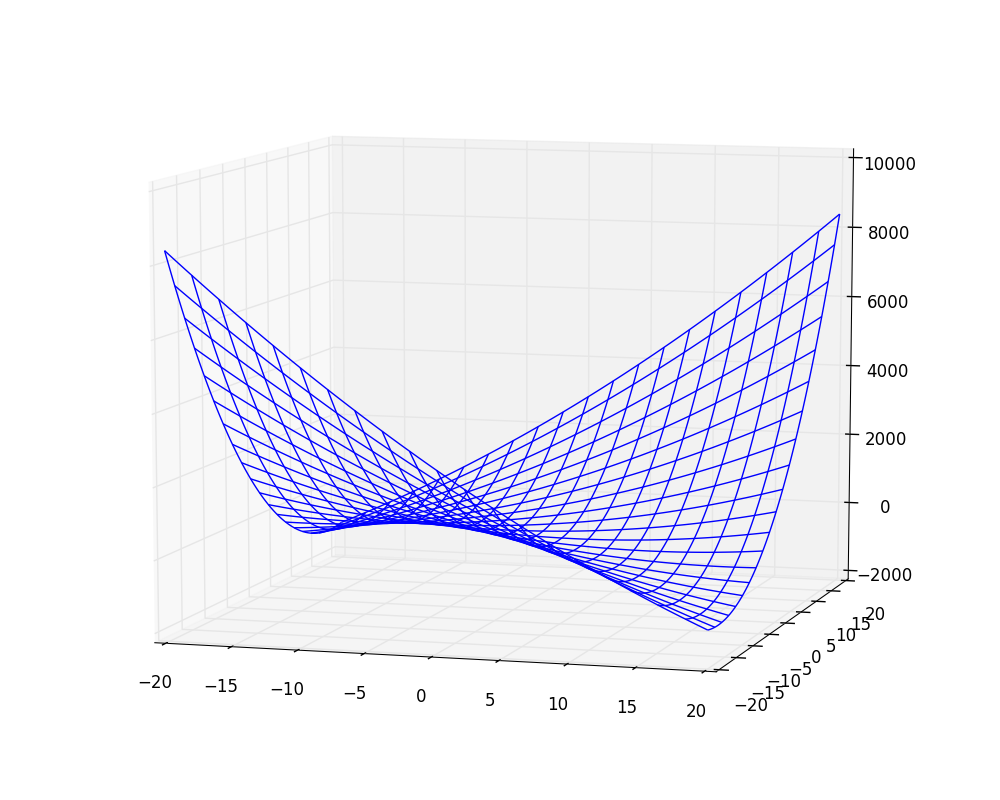

In [24]:
Image(filename ='figure_1.png', width = 800)

* Clearly now, for some values of *x*<sub>i</sub> the *z* value is less than zero

* Now for an example which is clearly definite positive

In [25]:
A = Matrix([[2, 6], [6, 26]])
A

⎡2  6 ⎤
⎢     ⎥
⎣6  26⎦

In [26]:
f = x_vect.transpose() * A * x_vect
f.expand()

⎡    2                   2⎤
⎣2⋅x₁  + 12⋅x₁⋅x₂ + 26⋅x₂ ⎦

In [28]:
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig)
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
[x, y] = np.meshgrid(x, y)
z = 2 * x ** 2 + 12 * x * y + 26 * y ** 2

ax.plot_wireframe(x, y, z, rstride = 5, cstride = 5)
plt.show();

<Figure size 1000x800 with 0 Axes>

## Minina

* We use the following function from our symmetric matrix above
$$ {f}\left({{x}_{1},{x}_{2}}\right)=2{x}_{1}^{2}+12{{x}_{1}}{{x}_{2}}+18{x}_{2}^{2} $$

* Completing the square we have the following
$$ {f}\left({{x}_{1},{x}_{2}}\right)=2\left({x}_{1}+3{x}_{2}\right)^{2}+2{x}_{2} $$
* From this we can see that we are dealing with all positive values irrespective of the values of the variables

In [29]:
(2 * (x1 + 3 * x2) ** 2).expand() # Just checking if we are correct

    2                   2
2⋅x₁  + 12⋅x₁⋅x₂ + 18⋅x₂ 

* Setting the equation equal to (a positive) value will *cut through* the plot and result in an ellipse
* *Cutting though* a saddle point results in a hyperbola

In [30]:
# Rewriting the function above as a computer variable
function = 2 * (x1 + 3 * x2) ** 2 + 2 * x2 ** 2
function

    2                2
2⋅x₂  + 2⋅(x₁ + 3⋅x₂) 

In [31]:
# Derivative(f, variable with whicg respect to partial derivative is taken, order)
Derivative(function, x1) # Printing the partial derivative to the screen

 ∂ ⎛    2                2⎞
───⎝2⋅x₂  + 2⋅(x₁ + 3⋅x₂) ⎠
∂x₁                        

In [32]:
Derivative(function, x1).doit() # The .doit() method execute the partial derivative

4⋅x₁ + 12⋅x₂

In [33]:
diff(function, x2, 1) # Alternative method of doing the partial derivative

12⋅x₁ + 40⋅x₂

* Solving for the two variables in two equations using an augmented matrix

In [34]:
M = Matrix([[4, 12, 0], [12, 40, 0]])
M.rref()

⎛⎡1  0  0⎤        ⎞
⎜⎢       ⎥, (0, 1)⎟
⎝⎣0  1  0⎦        ⎠

* Let's look at this if we cut through the *x<sub>1</sub>z*-plane (that is *x<sub>y</sub>* = 0) and the *x<sub>2</sub>z*-plane (that is *x<sub>1</sub>*=0)
$$ f\left( { x }_{ 1 },{ x }_{ 2 } \right) =2{ \left( { x }_{ 1 }+3{ x }_{ 2 } \right)  }^{ 2 }+2{ x }_{ 2 }^{ 2 }\\ f\left( { x }_{ 1 },0 \right) =2{ \left( { x }_{ 1 } \right)  }^{ 2 }\\ f\left( 0,{ x }_{ 2 } \right) =2{ \left( 3{ x }_{ 2 } \right)  }^{ 2 }+2{ x }_{ 2 }^{ 2 }=8{ x }_{ 2 }^{ 2 } $$

* Let's look at the two plots

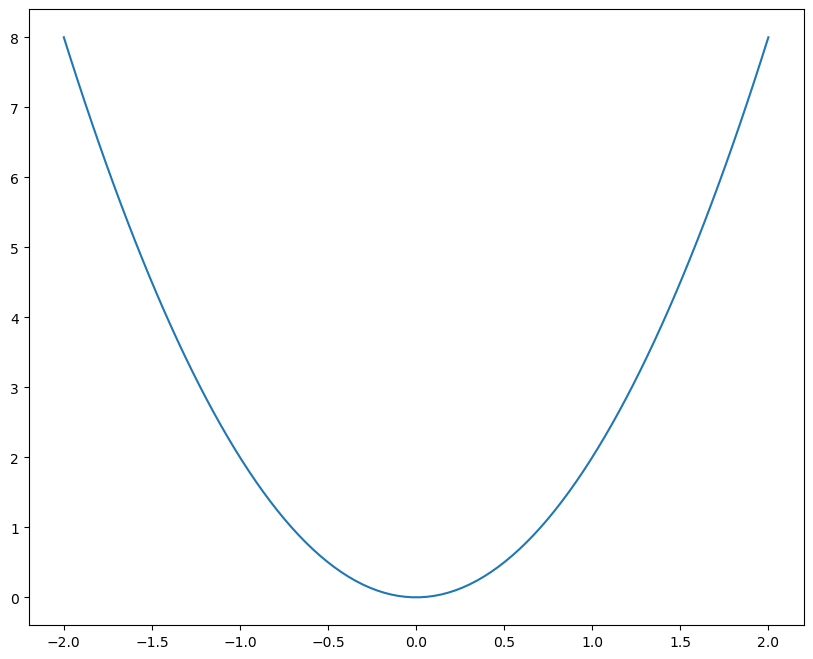

In [36]:
x = np.linspace(-2, 2, 100)

plt.figure(figsize = (10, 8))
plt.plot(x, 2 * x **2)
plt.show();

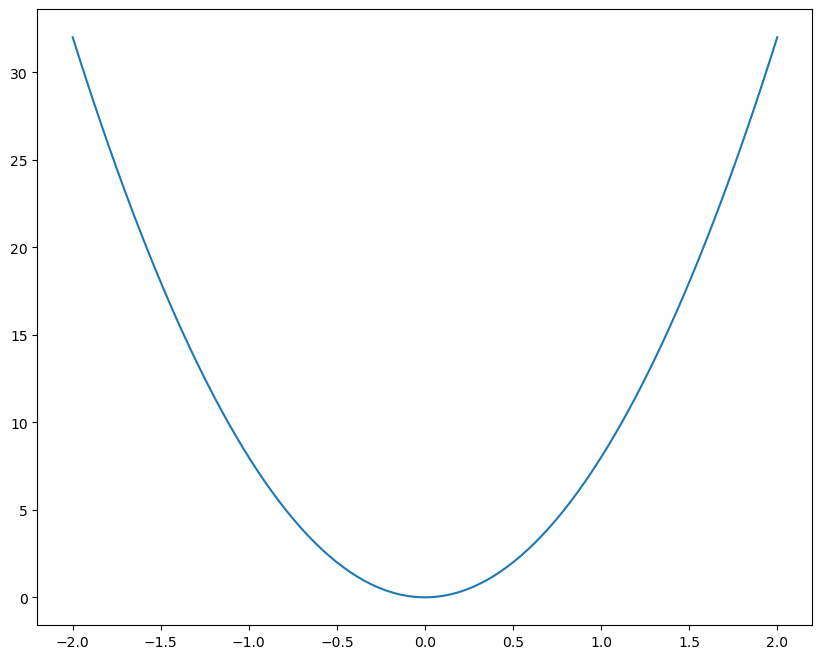

In [38]:
y = np.linspace(-2, 2, 100)

plt.figure(figsize = (10, 8))
plt.plot(y, 8 * x **2)
plt.show();

* If you reconstruct this in your mind's eye, you can see that we are dealing with a bowl shape
* Remember from calculus that an extrema is a first derivative set to zero
* We look at the second derivative to know if we are dealing with a minimum or a maximum

In [39]:
diff(2 * x1 ** 2, x1, 2) # Taking a derivative twice

4

In [40]:
diff(8 * x2 ** 2, x2, 2)

16

* These second derivatives are both positive and we have a minimum

* Let's go for a setup again which will not be positive definite
$$ {f}\left({{x}_{1},{x}_{2}}\right)=2{x}_{1}^{2}+12{{x}_{1}}{{x}_{2}}+7{x}_{2}^{2} $$
* Completing the square will have the following equation
$$ {f}\left({{x}_{1},{x}_{2}}\right)=2\left({x}_{1}+3{x}_{2}\right)^{2}-11{x}_{2}^{2} $$

In [41]:
function = 2 * (x1 + 3 * x2) ** 2 - 11 * x2 ** 2
function, function.expand() # Just checking to see if our completion of the square was correct

⎛       2                2      2                  2⎞
⎝- 11⋅x₂  + 2⋅(x₁ + 3⋅x₂) , 2⋅x₁  + 12⋅x₁⋅x₂ + 7⋅x₂ ⎠

In [42]:
Derivative(function, x1), diff(function, x1)

⎛ ∂ ⎛       2                2⎞              ⎞
⎜───⎝- 11⋅x₂  + 2⋅(x₁ + 3⋅x₂) ⎠, 4⋅x₁ + 12⋅x₂⎟
⎝∂x₁                                         ⎠

In [43]:
Derivative(function, x2), diff(function, x2)

⎛ ∂ ⎛       2                2⎞               ⎞
⎜───⎝- 11⋅x₂  + 2⋅(x₁ + 3⋅x₂) ⎠, 12⋅x₁ + 14⋅x₂⎟
⎝∂x₂                                          ⎠

In [44]:
M = Matrix([[4, 12, 0], [12, 14, 0]])
M.rref()

⎛⎡1  0  0⎤        ⎞
⎜⎢       ⎥, (0, 1)⎟
⎝⎣0  1  0⎦        ⎠

* Again, an extrema at (0,0)

* In your mind's eye we clearly have a saddle point at (*x*<sub>1</sub>,*x*<sub>2</sub>)=(0,0)

* Let's look at *x*<sub>1</sub>=-*x*<sub>2</sub>
$$ f\left( { x }_{ 1 },{ x }_{ 2 } \right) =2{ x }_{ 1 }^{ 2 }+12{ x }_{ 1 }{ x }_{ 2 }+7{ x }_{ 2 }^{ 2 }\\ f\left( { x }_{ 1 },{ -x }_{ 1 } \right) =2{ x }_{ 1 }^{ 2 }-12{ x }_{ 1 }{ x }_{ 1 }+7{ x }_{ 1 }^{ 2 }\\ f\left( { x }_{ 1 },{ -x }_{ 1 } \right) =2{ x }_{ 1 }^{ 2 }-12{ x }_{ 1 }^{ 2 }+7{ x }_{ 1 }^{ 2 }\\ f\left( { x }_{ 1 },{ -x }_{ 1 } \right) =-3{ x }_{ 1 }^{ 2 } $$
* We are creating a 45<sup>0</sup> plane and values for *z* will be negative here

* This is what makes the matrix *non*-positive definite
* **x**<sup>T</sup>A**x** will result in an equation which we can use to show always, not-always positive (and the marginal case described above)

* So positive definite is the matrix equivalent of the first and second derivative in calculus (which looks at the shape of the plot, i.e extrema)

* For a 2&#215;2 we are thus looking for the following
$$ \begin{bmatrix} \frac { \partial  }{ \partial x\partial x }  & \frac { \partial  }{ \partial x\partial y }  \\ \frac { \partial  }{ \partial y\partial x }  & \frac { \partial  }{ \partial y\partial y }  \end{bmatrix} $$

## The pivots, the multiplier and completing the square

* Let's take the matrix below
* We know it's symmetric and positive definite
* We also saw that for **x**<sup>T</sup>A**x** we had to complete the square to show *z*>0
* This can easily be done by looking at the pivots and the multiplier

In [45]:
A = Matrix([[2, 6], [6, 20]])
A

⎡2  6 ⎤
⎢     ⎥
⎣6  20⎦

In [46]:
L, U, _ = A.LUdecomposition()
L, U

⎛⎡1  0⎤  ⎡2  6⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣3  1⎦  ⎣0  2⎦⎠

* Note how the pivots are 2 and 2 and the multiplier was 3
* Now look at the completed square equation

In [47]:
(x_vect.transpose() * A * x_vect).expand()

⎡    2                   2⎤
⎣2⋅x₁  + 12⋅x₁⋅x₂ + 20⋅x₂ ⎦

$$ 2{ x }_{ 1 }^{ 2 }+12{ x }_{ 1 }{ x }_{ 2 }+20{ x }_{ 2 }^{ 2 }\\ 2{ \left( { x }_{ 1 }+3{ x }_{ 2 } \right)  }^{ 2 }+2{ x }_{ 2 }^{ 2 } $$

* So, we wanted squares, but we are also interested in what goes on *outside* the squares, i.e. the pivots (2 and 2 in our example)
* Positive pivots give sum of squares, everything positive means there is a minimum (everything goes up)
* We can extend this for any *n*&#215;*n* symmetric matrices

* Let's look again at the matrix of second derivatives we had above
$$ \begin{bmatrix} \frac { \partial  }{ \partial x\partial x }  & \frac { \partial  }{ \partial x\partial y }  \\ \frac { \partial  }{ \partial y\partial x }  & \frac { \partial  }{ \partial y\partial y }  \end{bmatrix} $$
* *f*<sub>xx</sub> and *f*<sub>yy</sub> have to be positive (for a minimum) and they have to be larger than the product of the other two, *f*<sub>xy</sub> and *f*<sub>yx</sub>

In [48]:
function = 2 * x1 ** 2 + 12 * x1 * x2 + 20 * x2 ** 2
function

    2                   2
2⋅x₁  + 12⋅x₁⋅x₂ + 20⋅x₂ 

In [49]:
fxx = diff(function, x1, 2)
fxy = diff(function, x1, x2)
fyx = diff(function, x2, x1)
fyy = diff(function, x2, 2)

In [50]:
deriv_matr = Matrix([[fxx, fxy], [fyx, fyy]])
deriv_matr

⎡4   12⎤
⎢      ⎥
⎣12  40⎦

In [51]:
deriv_matr.det()

16

* Setting the first partial derivatives equal to zero finds the extrema
* The condition above sets *everything positive* (positive definite)

* Let's the look at the following

In [52]:
function = 2 * x1 ** 2 + 12 * x1 * x2 + 7 * x2 ** 2
function

    2                  2
2⋅x₁  + 12⋅x₁⋅x₂ + 7⋅x₂ 

In [53]:
fxx = diff(function, x1, 2)
fxy = diff(function, x1, x2)
fyx = diff(function, x2, x1)
fyy = diff(function, x2, 2)

In [54]:
deriv_matr = Matrix([[fxx, fxy], [fyx, fyy]])
deriv_matr

⎡4   12⎤
⎢      ⎥
⎣12  14⎦

In [55]:
deriv_matr.det()

-88

* Although the matrix of second derivatives are all positive entries, the determinant is negative
* Not all conditions are met for the original matrix to be positive definite

## Let's step this up to 3&#215;3 symmetric matrices

In [56]:
A = Matrix([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
A

⎡2   -1  0 ⎤
⎢          ⎥
⎢-1  2   -1⎥
⎢          ⎥
⎣0   -1  2 ⎦

In [57]:
A.transpose() == A # Test to see of A is symmetric

True

* Is this symmetric matrix positive definite?

* Let's start by looking at the determinant (and *sub*-determinants)

In [58]:
A.det() # determinant of the whole matrix

4

* All the submatrices will be the following
$$ \left[ 2 \right] ,\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix},\begin{bmatrix} 2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 2 \end{bmatrix} $$
* There determinant are all positive (2, 3, 4)

* Let's look at the pivots

In [59]:
L, U, _ = A.LUdecomposition()
L, U

⎛⎡ 1     0    0⎤  ⎡2  -1    0 ⎤⎞
⎜⎢             ⎥  ⎢           ⎥⎟
⎜⎢-1/2   1    0⎥, ⎢0  3/2  -1 ⎥⎟
⎜⎢             ⎥  ⎢           ⎥⎟
⎝⎣ 0    -2/3  1⎦  ⎣0   0   4/3⎦⎠

* The pivots are all positive
$$ {2}, \quad \frac{3}{2}, \quad \frac{4}{3} $$

* Notice how the first determinant was 2 (also the first *sub*-determinant)
* The product of the first two pivots must equal the 2<sup>nd</sup> determinant (which is 3) and must therefor be <sup>3</sup>/<sub>2</sub>
* The product of the first three (all) pivots must equal the 4<sup>th</sup> determinant (which is 4) and must therefor be <sup>4</sup>/<sub>3</sub>

* Let's look at the eigenvalues

In [60]:
A.eigenvals()

{2: 1, 2 - √2: 1, √2 + 2: 1}

* Again, all positive
* So far, so good
* Just as a reminder, remember that the sum of the eigenvalues must equal the trace (sum of the entries on the main diagonal) and multiplying them must equal the determinant

* Let's look at **x**<sup>T</sup>A**x**

In [61]:
x_vect = Matrix([x1, x2, x3])
x_vect

⎡x₁⎤
⎢  ⎥
⎢x₂⎥
⎢  ⎥
⎣x₃⎦

In [62]:
(x_vect.transpose() * A * x_vect).expand()

⎡    2                 2                 2⎤
⎣2⋅x₁  - 2⋅x₁⋅x₂ + 2⋅x₂  - 2⋅x₂⋅x₃ + 2⋅x₃ ⎦

In [74]:
function = 1/4 * x1 ** 4 + x1 ** 2 + x1**2 * x2 + x2 ** 2
function # A cubic equation

       4     2        2     2
0.25⋅x₁  + x₁ ⋅x₂ + x₁  + x₂ 

* We can construct this as follows
* The main diagonal entries are the constant of the squared variables (2, 2, and 2)
* There is a -1 and a -1 in the *12* and *21* *row-column* positions, whose sum is -2 and which then belongs to the *x*<sub>1</sub>*x*<sub>2</sub> (or *x*<sub>2</sub>*x*<sub>1</sub>)
* The *13* and *31* entries are both zero, so there will be no *x*<sub>1</sub>*x*<sub>3</sub> coefficient
* The *23* and *32* entries are both -1, so again, a coefficient of -2 for *x*<sub>2</sub>*x*<sub>3</sub>

* This matrix represents a plot in 4D space, so we can't draw it
* We can construct it as the sum of three squares though
* The three squares will be made up of the three pivots (for their coefficients)
* They (and obviously the squared values) are all positive and therefor we will only have *f*(*x*,*y*,*z*) values which are positive

* Cutting through this 4D space (which is difficult to visualize) as say *f*(*x*,*y*,*z*) will give an ellipsoid (lopsided football)
* A sphere would have three equal eigenvalues
* A *football*-shape would have two identical eigenvalues and the third different
* The lopsided ellipsoid would all three eigenvalues different as in this case
* The half-lengths the axes of these shapes are 1 over the eigenvalues
* Diagonalization will give the principle axis theorem
$$ {Q}{\Lambda}{Q}^{T} $$

In [75]:
fxx = diff(function, x1, x1)
fxy = diff(function, x1, x2)
fyx = diff(function, x2, x1)
fyy = diff(function, x2, x2)


In [76]:
deriv_matr = Matrix([[fxx, fxy], [fyx, fyy]])
deriv_matr

⎡      2                 ⎤
⎢3.0⋅x₁  + 2⋅x₂ + 2  2⋅x₁⎥
⎢                        ⎥
⎣       2⋅x₁          2  ⎦

In [66]:
deriv_matr.det()

32

* The determinant (and all *sub*-determinants) are positive

## Example problems

### Example problem 1

* For which values of *c* will the following matrix be positive definite and *semi*-positive definite
$$ \begin{bmatrix} 2 & -1 & -1 \\ -1 & 2 & -1 \\ -1 & -1 & 2+c \end{bmatrix} $$

#### Solution

* Let's try the determinant test first

In [67]:
A = Matrix([[2, -1, -1], [-1, 2, -1], [-1, -1, 2 + c]])
A

⎡2   -1   -1  ⎤
⎢             ⎥
⎢-1  2    -1  ⎥
⎢             ⎥
⎣-1  -1  c + 2⎦

In [68]:
A.det()

3⋅c

* All the *sub*-determinants are positive, being 2, 3 and then 3*c* for *c*>0

* Let's look at the pivot test

In [69]:
L, U, _ = A.LUdecomposition()
L, U

⎛⎡ 1    0   0⎤  ⎡2  -1    -1 ⎤⎞
⎜⎢           ⎥  ⎢            ⎥⎟
⎜⎢-1/2  1   0⎥, ⎢0  3/2  -3/2⎥⎟
⎜⎢           ⎥  ⎢            ⎥⎟
⎝⎣-1/2  -1  1⎦  ⎣0   0    c  ⎦⎠

* Again, all the pivots (in U) are positive for *c* > 0
* So for positive definite we have *c*>0 and for semi-definite we have *c*=0

In [70]:
A.eigenvals()

⎧             ______________                ______________       ⎫
⎪            ╱  2                          ╱  2                  ⎪
⎨      c   ╲╱  c  + 2⋅c + 9    3     c   ╲╱  c  + 2⋅c + 9    3   ⎬
⎪3: 1, ─ - ───────────────── + ─: 1, ─ + ───────────────── + ─: 1⎪
⎩      2           2           2     2           2           2   ⎭

* The energy or completing the square test

In [71]:
(x_vect.transpose() * A * x_vect).expand()

⎡    2       2                           2                 2⎤
⎣c⋅x₃  + 2⋅x₁  - 2⋅x₁⋅x₂ - 2⋅x₁⋅x₃ + 2⋅x₂  - 2⋅x₂⋅x₃ + 2⋅x₃ ⎦

* For *x*<sub>3</sub> we have (*c*+2)(*x*<sub>3</sub><sup>2</sup>)
* Remember, though, that for the squares of the **x**-components we must have the entries along the main diagonal of A as their coefficients; this *c* + 2 = 2 and hence, again, *c*=0

* For interest's sake, we will have the following completed square equation
$$ 2\left({x}-\frac{1}{2}{y}-\frac{1}{2}{z}\right)^{2}+\frac{3}{2}\left({y}-{z}\right)^{2}+{c}{z}^{2} $$

* Now the coefficients come from the values along the diagonal of U
* The -&#189; values come from the multipliers as seen in column 1 of L
* The +1 and -1 for (*y*-*z*)<sup>2</sup> come from column 2 of L
* The +1 in front of *z*<sup>2</sup> come from column 3 of L (actually every set of ()<sup>'s</sup> contains and *x*, *y* and *z*, some coefficients (from L) are just zero)
* Be that as it may, the squared equation as it stands will only equal zero if *x*=*y*=*z*=0
* For a value of more than zero, *c* must be positive
* Please note that by *x*,*y* and *z* I am referring to *x*<sub>1</sub>, *x*<sub>2</sub> and *x*<sub>3</sub>

* If *x*=0 we have the following matrix

In [72]:
A = Matrix([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]])
A

⎡2   -1  -1⎤
⎢          ⎥
⎢-1  2   -1⎥
⎢          ⎥
⎣-1  -1  2 ⎦

In [73]:
A.det()

0

* A singular matrix, again only possible if all variables equal zero